In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# study data files
Mouse_metadata = "Mouse_metadata.csv"
Study_results = "Study_results.csv"

# read mouse metadata & study results
Mouse_metadata = pd.read_csv(Mouse_metadata)
Study_results = pd.read_csv(Study_results)

In [8]:
# Creating "laboratory_data" from "Mouse_metadata" & "Study_results"
laboratory_data = pd.merge(Mouse_metadata, Study_results, how = "outer", on = "Mouse ID")

In [9]:
# generate the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.
laboratory_data_mean = laboratory_data.groupby(["Drug Regimen"]).mean()
laboratory_data_median = laboratory_data.groupby(["Drug Regimen"]).median()
laboratory_data_variance = laboratory_data.groupby(["Drug Regimen"]).var()
laboratory_data_standard_deviation = laboratory_data.groupby(["Drug Regimen"]).std()
laboratory_data_standard_SEM = laboratory_data.groupby(["Drug Regimen"]).sem()

In [10]:
# creating summary statistics table
summary_statistics_table = pd.concat([laboratory_data_mean["Tumor Volume (mm3)"], 
                                      laboratory_data_median["Tumor Volume (mm3)"], 
                                      laboratory_data_variance["Tumor Volume (mm3)"], 
                                      laboratory_data_standard_deviation["Tumor Volume (mm3)"], 
                                      laboratory_data_standard_SEM["Tumor Volume (mm3)"]], axis = 1)

In [11]:
#  Cleaning the columns for more clarity
summary_statistics_table.columns = ["Mean Tumor Volume (mm3)", 
                                    "Median Tumor Volume (mm3)", 
                                    "Tumor Volume (mm3) - Variance", 
                                    "Tumor Volume (mm3) - Standard Deviation", 
                                    "Tumor Volume (mm3) - SEM"]
# Print
summary_statistics_table

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume (mm3) - Variance,Tumor Volume (mm3) - Standard Deviation,Tumor Volume (mm3) - SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Number of Data Points')

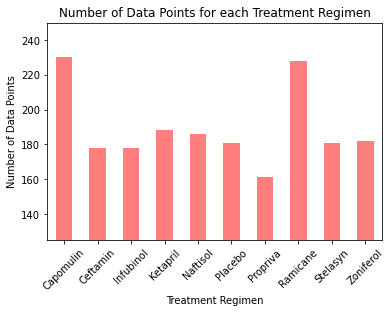

In [12]:
# Generating bar chart with the Pandas DataFrame.plot() method.
laboratory_data_count = laboratory_data.groupby(["Drug Regimen"]).count()
dropped_laboratory_data_count = laboratory_data_count.drop(["Sex", 
                                                            "Age_months", 
                                                            "Weight (g)", 
                                                            "Timepoint", 
                                                            "Tumor Volume (mm3)", 
                                                            "Metastatic Sites"], axis = 1)
#  pandas plot = matplotlib plot
pymaceuticals_bar_plot = dropped_laboratory_data_count.plot(kind = "bar", 
                                                            title = "Number of Data Points for each Treatment Regimen", 
                                                            legend = False, 
                                                            alpha = 0.5, 
                                                            color = "red", 
                                                            width = 0.5, 
                                                            ylim = (125, 250), 
                                                            rot = 45)
# Axis labels for the plot
pymaceuticals_bar_plot.set_xlabel("Treatment Regimen")
pymaceuticals_bar_plot.set_ylabel("Number of Data Points")

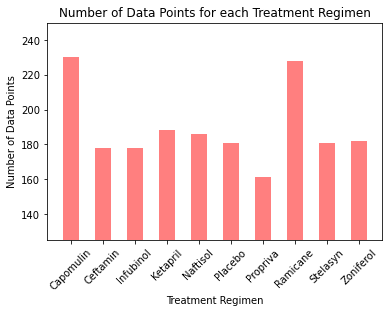

In [13]:
# Generating bar chart with Matplotlib's pyplot methods.
# array that contains the instances.
mouse_id = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
x_axis = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# Creating a graph with the two lists.
plt.bar(x_axis, mouse_id, color = "red", alpha = 0.5, align = "center", width = 0.5)
# Location on where to place each of our x axis headers.
tick_locations = [value for value in x_axis]
drug_regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", 
                "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
plt.xticks(tick_locations, drug_regimen, rotation = 45)
# Adding title & labels to plot.
plt.xlabel("Treatment Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points for each Treatment Regimen")
# Creating another y-limit 
plt.ylim((125, 250))
# Print
plt.show()

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# "groupby" the "Sex" and count the number of female and male mice
female_male_distribution = laboratory_data.groupby(["Sex"]).nunique()
# Delete the unnecessary columns
del female_male_distribution["Drug Regimen"]
del female_male_distribution["Sex"]
del female_male_distribution["Age_months"]
del female_male_distribution["Weight (g)"]
del female_male_distribution["Timepoint"]
del female_male_distribution["Tumor Volume (mm3)"]
del female_male_distribution["Metastatic Sites"]
# Show percentages because the values are very close; we also want our pie plot from pandas to look identical to the pie plot from matplotlib.
pymaceuticals_pie_plot = female_male_distribution.plot.pie(y = "Mouse ID", 
                                                           autopct = '%1.1f%%', 
                                                           legend = False, 
                                                           title = "Distribution of Female Mice versus Male Mice", 
                                                           colors = ["blue", "orange"])

KeyError: 'Sex'

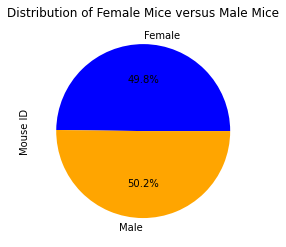

In [17]:
# Generating a pie plot showing the distribution of female versus male mice using pyplot.
# Labels for the sections of our pie chart
labels = ["Female", "Male"]
# The values of each section of the pie chart
sizes = [124, 125]
# colors of each section of the pie chart
colors = ["blue", "orange"]
# Creating pie chart based upon the values above
plt.pie(sizes, labels = labels, colors = colors, autopct = "%1.1f%%")
plt.title("Distribution of Female Mice versus Male Mice")
plt.ylabel("Mouse ID")
plt.show()

In [19]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Because we are looking for the final tumor volume, and not all of the tumor volumes, we find the maximum timepoint for each Mouse ID.
laboratory_data_copy = laboratory_data.copy()
# Delete the unnecessary columns (the ones that we are not looking at).
del laboratory_data_copy["Sex"]
del laboratory_data_copy["Age_months"]
del laboratory_data_copy["Weight (g)"]
del laboratory_data_copy["Metastatic Sites"]
# The "last" method finds the final periods of time series data (which this is, based on "Timepoint"). This is useful because the "min" and "max" functions will not count the mice that did not finish the trial, and for tumor volume, it will only return a non-corresponding maximum and minimum (regardless of the timepoint). We also group by the Mouse ID to find their unique timepoints and tumor volumes. Lastly, we set the index to "Drug Regimen" in order to eventually use the "locate" method to search for the drug regimens of interest in the DataFrame.
final_tumor_volume_df = laboratory_data_copy.groupby("Mouse ID").last().set_index("Drug Regimen")
# Delete the "Timepoint" column and make this a Series so that we can perform aggregate functions on it.
del final_tumor_volume_df["Timepoint"]
# For instances of their final tumor volume...
capomulin = final_tumor_volume_df.loc["Capomulin"]
ramicane = final_tumor_volume_df.loc["Ramicane"]
infubinol = final_tumor_volume_df.loc["Infubinol"]
ceftamin = final_tumor_volume_df.loc["Ceftamin"]
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# We use pandas to give us our quartile calculations.
# 1st, Capomulin...
capomulin_min = capomulin.min()
capomulin_max = capomulin.max()
capomulin_quartiles = capomulin["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
# 2nd, Ramicane...
ramicane_min = ramicane.min()
ramicane_max = ramicane.max()
ramicane_quartiles = ramicane["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
# 3rd, Infubinol...
infubinol_min = infubinol.min()
infubinol_max = infubinol.max()
infubinol_quartiles = infubinol["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
# 4th, Ceftamin...
ceftamin_min = ceftamin.min()
ceftamin_max = ceftamin.max()
ceftamin_quartiles = ceftamin["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

In [20]:
print(f"The IQR for Capomulin is: {round(capomulin_iqr, 3)}")
print(f"The lower bound for Capomulin is {round(capomulin_lower_bound, 3)}; values below this may be outliers.")
print(f"The upper bound for Capomulin is {round(capomulin_upper_bound, 3)}; values above this may be outliers.""\n")

print(f"The IQR for Ramicane is: {round(ramicane_iqr, 3)}")
print(f"The lower bound for Ramicane is {round(ramicane_lower_bound, 3)}; values below this may be outliers.")
print(f"The upper bound for Ramicane is {round(ramicane_upper_bound, 3)}; values above this may be outliers.""\n")

print(f"The IQR for Infubinol is: {round(infubinol_iqr, 3)}")
print(f"The lower bound for Infubinol is {round(infubinol_lower_bound, 3)}; values below this may be outliers.")
print(f"The upper bound for Infubinol is {round(infubinol_upper_bound, 3)}; values above this may be outliers.""\n")

print(f"The IQR for Ceftamin is: {round(ceftamin_iqr, 3)}")
print(f"The lower bound for Ceftamin is {round(ceftamin_lower_bound, 3)}; values below this may be outliers.")
print(f"The upper bound for Ceftamin is {round(ceftamin_upper_bound, 3)}; values above this may be outliers.")

The IQR for Capomulin is: 7.782
The lower bound for Capomulin is 20.705; values below this may be outliers.
The upper bound for Capomulin is 51.832; values above this may be outliers.

The IQR for Ramicane is: 9.099
The lower bound for Ramicane is 17.913; values below this may be outliers.
The upper bound for Ramicane is 54.307; values above this may be outliers.

The IQR for Infubinol is: 11.477
The lower bound for Infubinol is 36.833; values below this may be outliers.
The upper bound for Infubinol is 82.741; values above this may be outliers.

The IQR for Ceftamin is: 15.578
The lower bound for Ceftamin is 25.355; values below this may be outliers.
The upper bound for Ceftamin is 87.666; values above this may be outliers.


C:\Users\HP.LAPTOP-DGGARQJP\AppData\Local\Temp\ipykernel_16228\3523076419.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


{'whiskers': [<matplotlib.lines.Line2D at 0x1d752efaac0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d752ef4880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d752efaf70>,
 'medians': [<matplotlib.lines.Line2D at 0x1d752f01280>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d752f01550>,
 'means': []}

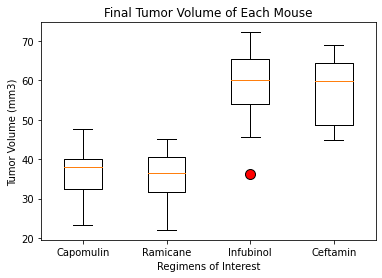

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest.
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Regimens of Interest")
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
# Highlight any potential outliers in the plot by changing their color and style.
flierprops_capomulin = dict(marker = "o", markerfacecolor = "red", markersize = 10, markeredgecolor = "black")
# Combine our data into one variable to hold the four regimens of interest.
four_regimens = [capomulin["Tumor Volume (mm3)"], ramicane["Tumor Volume (mm3)"], 
                 infubinol["Tumor Volume (mm3)"], ceftamin["Tumor Volume (mm3)"]]
ax1.boxplot(four_regimens, flierprops = flierprops_capomulin)

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin.
line_plot_df = final_tumor_volume_df.loc["Capomulin", :]

In [23]:
# This is for a single mouse; I chose mouse "s185".
x_axis = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
y_axis = [45.000000, 43.878496, 37.614948, 38.177232, 36.866876, 
          33.949940, 32.959671, 28.328531, 25.472143, 23.343598]

Text(0.5, 1.0, 'Tumor Volume over each Timepoint for s185')

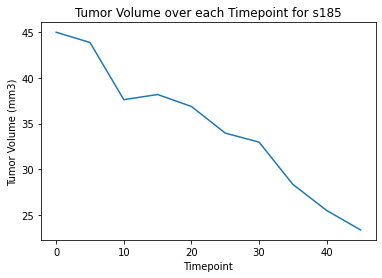

In [24]:
# Create a graph based upon the two lists that we have created.
plt.plot(x_axis, y_axis)
# Give our graph axis labels and a title.
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume over each Timepoint for s185")

The correlation between both factors is 0.84.


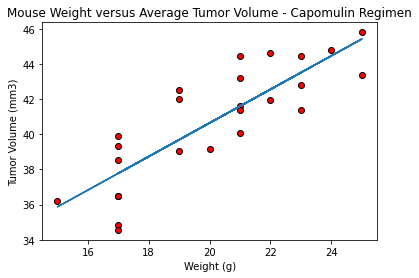

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen.
scatter_plot_df = laboratory_data.groupby(["Drug Regimen", "Mouse ID"]).mean().loc["Capomulin"]
# Delete the unneeded columns.
del scatter_plot_df["Age_months"]
del scatter_plot_df["Timepoint"]
del scatter_plot_df["Metastatic Sites"]
mouse_weight = scatter_plot_df.reset_index().drop(columns = ["Mouse ID"]).loc[:, "Weight (g)"]
# These are still DataFrames, not lists; so, they must be converted.
mouse_weight_list = mouse_weight.values.tolist()
tumor_volume = scatter_plot_df.reset_index().drop(columns = ["Mouse ID"]).loc[:, "Tumor Volume (mm3)"]
tumor_volume_list = tumor_volume.values.tolist()
# Tell matplotlib to create a scatter plot based upon the above data.
plt.scatter(mouse_weight_list, tumor_volume_list, marker = "o", facecolors = "red", edgecolors = "black")
# Create a title, x label, and y label for our chart.
plt.title("Mouse Weight versus Average Tumor Volume - Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
# Calculate the correlation coefficient and linear regression model
# (cont.) for mouse weight and average tumor volume for the Capomulin regimen
x = scatter_plot_df.loc[:, "Weight (g)"]
y = scatter_plot_df.loc[:, "Tumor Volume (mm3)"]
correlation_coefficient = st.pearsonr(x, y)
print(f"The correlation between both factors is {round(correlation_coefficient[0],2)}.")
# Plot the linear regression model on top of the previous scatter plot.
y_slope, y_int, y_r, y_p, y_std_err = st.linregress(x, y)
y_fit = y_slope * x + y_int
plt.plot(x,y_fit)